In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.ndimage import gaussian_filter
from tqdm import tqdm


In [52]:
import matplotlib

font = {'size' : 18}

matplotlib.rc('font', **font)

matplotlib.rcParams['figure.figsize'] = (10, 8)


In [2]:
# choose whether to load dataset with pickle or hdf5 files (using hickle)
use_pickle = True

data_root = '../data'

if use_pickle:
    import pickle
    data_path = "dataset_pickle"
    file_ext = "pickle"
else:
    import hickle
    data_path = "dataset_h5"
    file_ext = "h5"

data_path = os.path.join(data_root, data_path)

In [3]:
def load_shot(shotno):
    with open(os.path.join(data_path, f"{shotno}.{file_ext}"), "rb") as f:
        if use_pickle:
            return pickle.load(f)
        else:
            return hickle.load(f)

In [4]:
all_shots = [int(os.path.basename(x.split(f".{file_ext}")[0])) 
             for x in glob.glob(os.path.join(data_path, f"*.{file_ext}"))]

In [28]:
spec_odd_all = []
experience_duration = []
for shotno in all_shots:
    shot = load_shot(shotno)
    spec_odd = shot['x']['spectrogram']['OddN']
    time = shot['x']['spectrogram']['time']
    mask = np.isnan(spec_odd) | np.isinf(spec_odd)
    mean = np.mean(spec_odd[~mask])
    std = np.std(spec_odd[~mask])
    spec_odd[mask] = mean

    spec_odd = (spec_odd - mean) / std
    spec_odd_all.append(spec_odd)

    experience_duration.append(time[-1])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 80.]),
 array([-39.52665991, -36.18944958, -32.85223925, -29.51502891,
        -26.17781858, -22.84060825, -19.50339792, -16.16618759,
        -12.82897725,  -9.49176692,  -6.15455659]),
 <BarContainer object of 10 artists>)

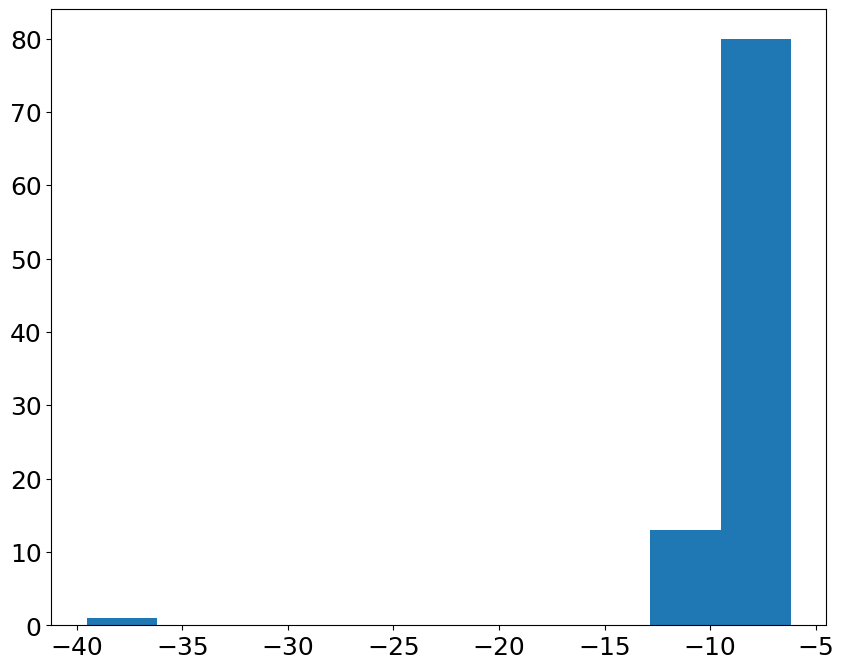

In [53]:
min_energies = []
for spec_odd in spec_odd_all:
    min_energies.append(spec_odd.min())

plt.hist(min_energies)

(array([ 2.,  0., 13., 12., 22., 21., 12.,  8.,  2.,  2.]),
 array([0.61526478, 0.6537383 , 0.69221183, 0.73068535, 0.76915887,
        0.80763239, 0.84610591, 0.88457943, 0.92305296, 0.96152648,
        1.        ]),
 <BarContainer object of 10 artists>)

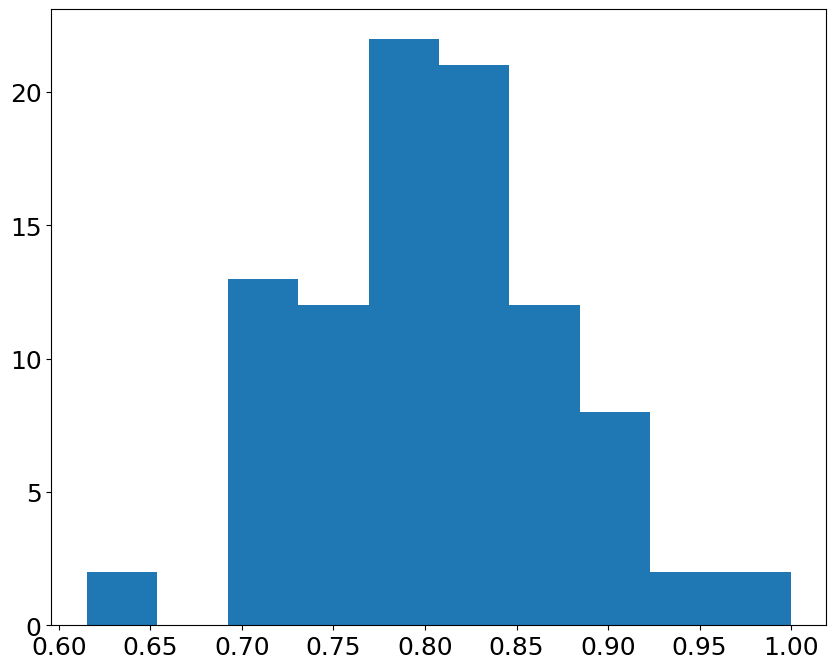

In [54]:
max_energies = []
for spec_odd in spec_odd_all:
    max_energies.append(spec_odd.max())
plt.hist(max_energies/np.max(max_energies))

(array([ 3.,  3., 13., 17., 16., 15., 22.,  3.,  0.,  2.]),
 array([-0.97717619, -0.77945857, -0.58174095, -0.38402333, -0.18630571,
         0.01141191,  0.20912953,  0.40684714,  0.60456476,  0.80228238,
         1.        ]),
 <BarContainer object of 10 artists>)

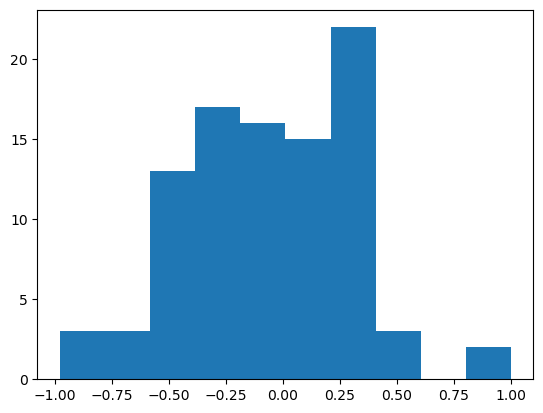

In [8]:
mean_energies = []
for spec_odd in spec_odd_all:
    mean_energies.append(spec_odd.mean())
plt.hist(mean_energies/np.max(mean_energies))

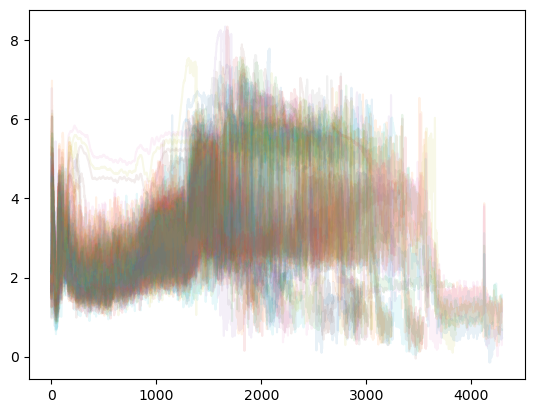

In [9]:
for spec_odd in spec_odd_all:
    plt.plot(np.max(spec_odd, axis=1), alpha=0.1)

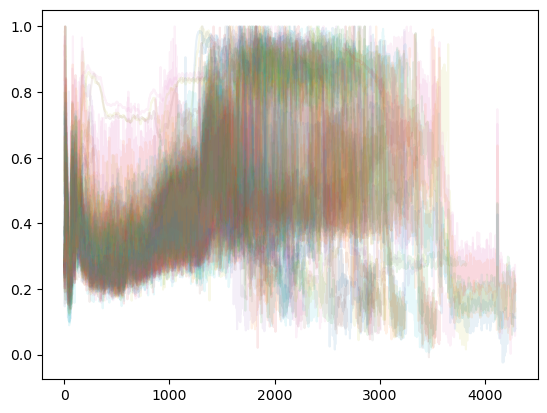

In [10]:
for spec_odd in spec_odd_all:
    max_energies = np.max(spec_odd, axis=1)
    plt.plot(max_energies/np.max(max_energies), alpha=0.1)

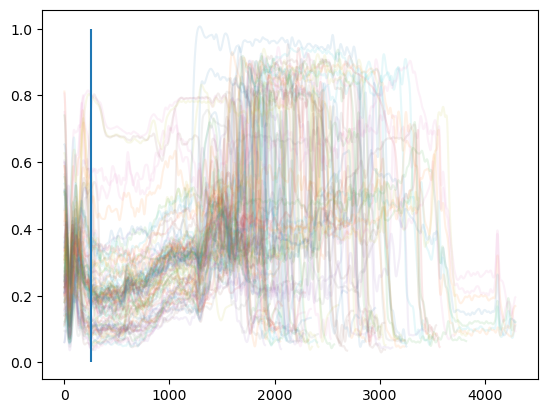

In [11]:
for spec_odd in spec_odd_all:
    max_energies = np.max(spec_odd, axis=1)
    max_energies = (max_energies - np.min(max_energies)) / np.max(max_energies)
    plt.plot(gaussian_filter(max_energies, 10), alpha=0.1)

plt.vlines(250, 0, 1)

min lenght=0.715776, max length=2.198528, mean=1.3895462127659577, std=0.3696001409512566


Text(0, 0.5, 'count')

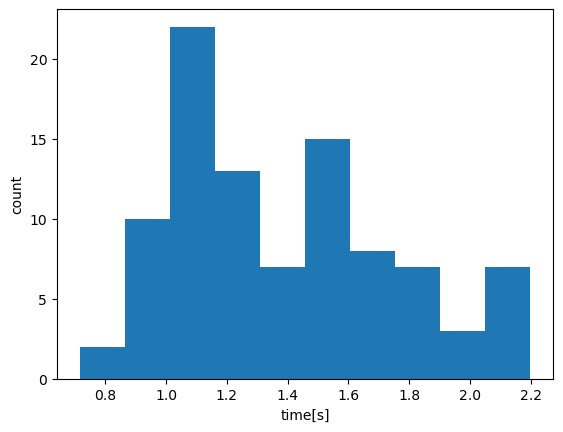

In [34]:
print(f'min lenght={np.min(experience_duration)}, max length={np.max(experience_duration)}, mean={np.mean(experience_duration)}, std={np.std(experience_duration)}')
plt.hist(experience_duration)
plt.xlabel('time[s]')
plt.ylabel('count')

min lenght=1397, max length=4293, mean=2692.6170212765956, std=717.2332939902808


(array([ 2., 11., 22., 13.,  7., 15.,  8.,  7.,  2.,  7.]),
 array([1397. , 1686.6, 1976.2, 2265.8, 2555.4, 2845. , 3134.6, 3424.2,
        3713.8, 4003.4, 4293. ]),
 <BarContainer object of 10 artists>)

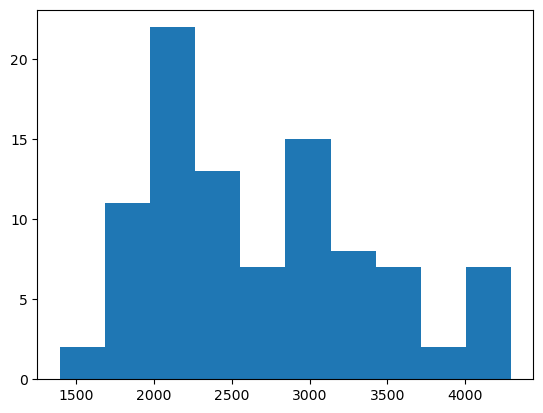

In [13]:
total_x_pixels = []

for spec_odd in spec_odd_all:
    total_x_pixels.append(spec_odd.shape[0])

print(f'min lenght={np.min(total_x_pixels)}, max length={np.max(total_x_pixels)}, mean={np.mean(total_x_pixels)}, std={np.std(total_x_pixels)}')
plt.hist(total_x_pixels)

In [ ]:
total_x_time = []

for spec_odd in spec_odd_all:
    total_x_pixels.append(spec_odd.shape[0])

print(f'min lenght={np.min(total_x_pixels)}, max length={np.max(total_x_pixels)}, mean={np.mean(total_x_pixels)}, std={np.std(total_x_pixels)}')
plt.hist(total_x_pixels)

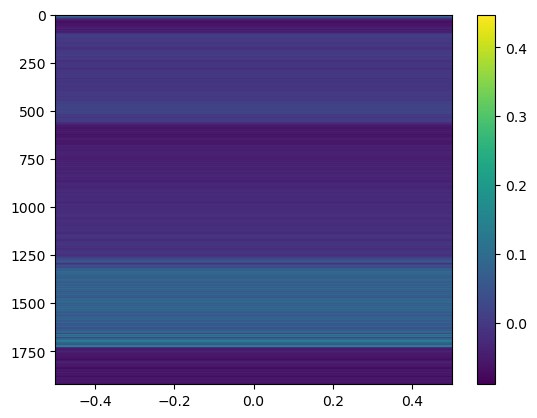

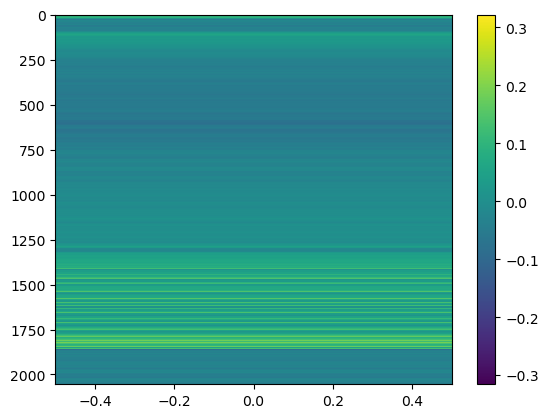

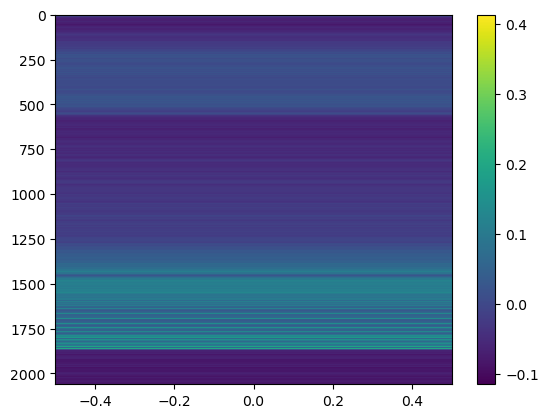

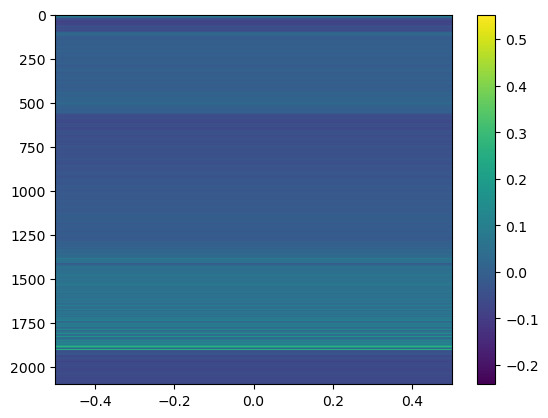

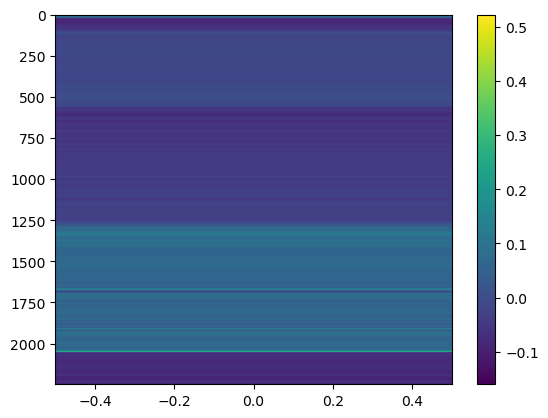

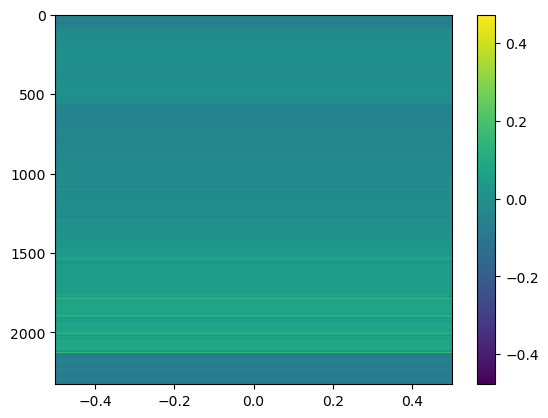

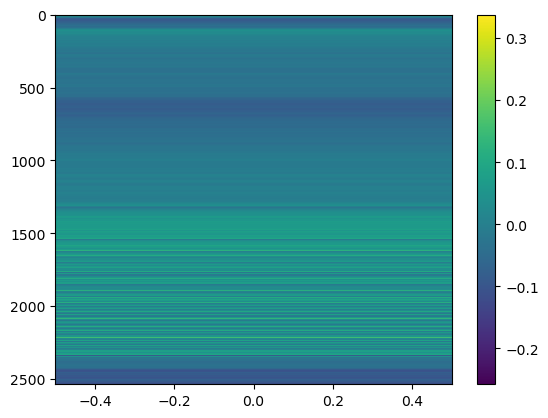

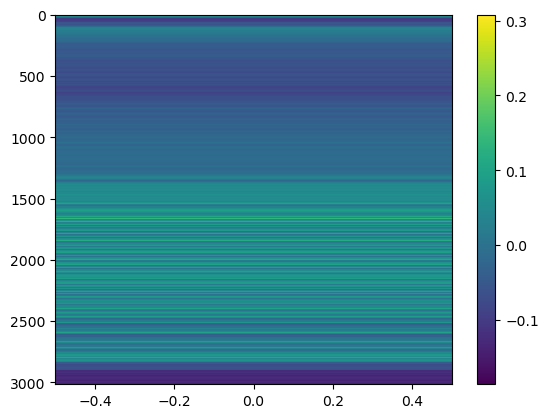

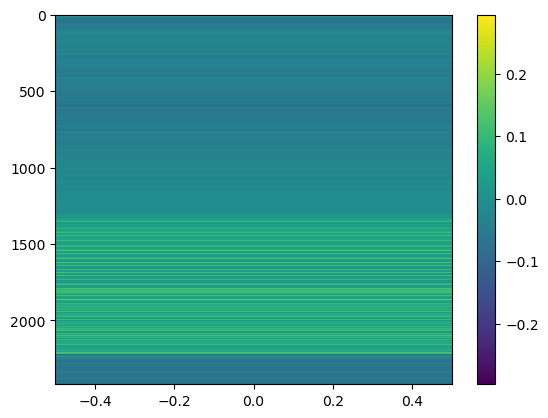

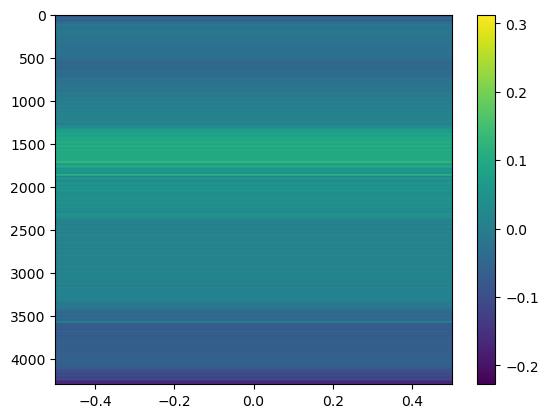

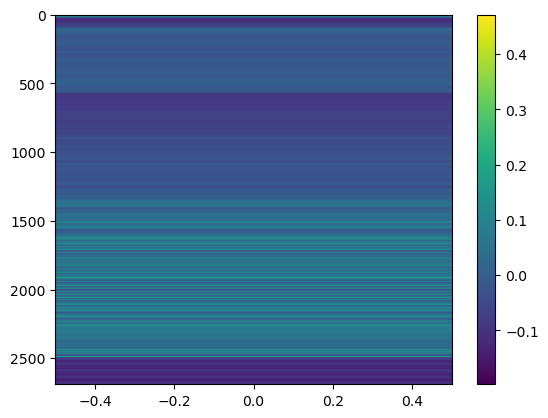

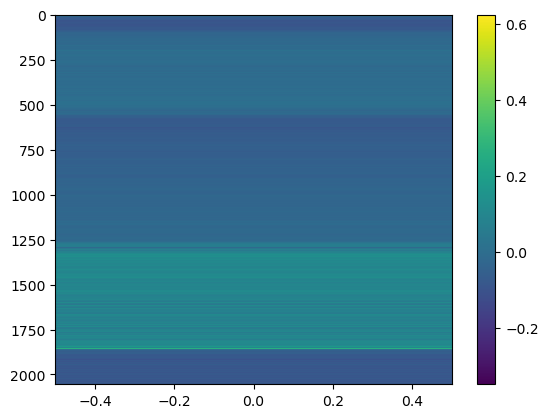

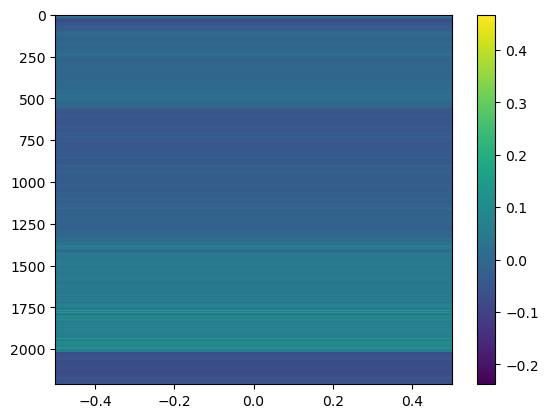

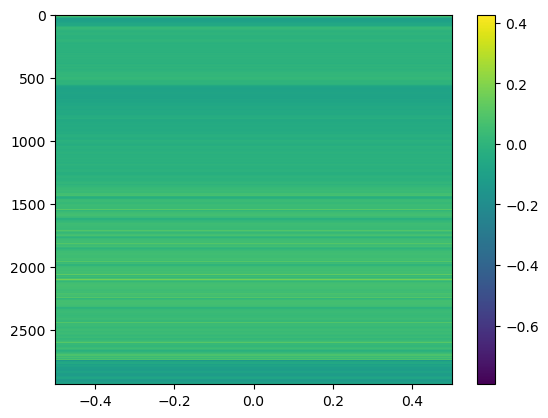

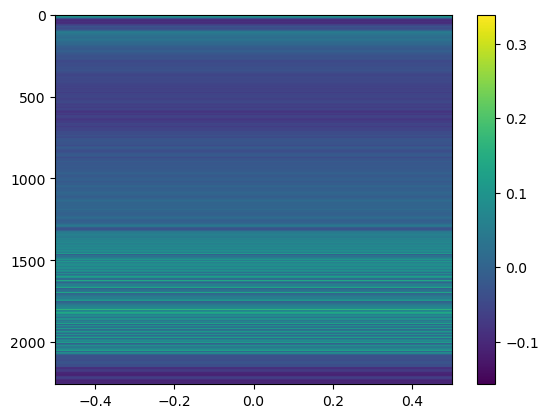

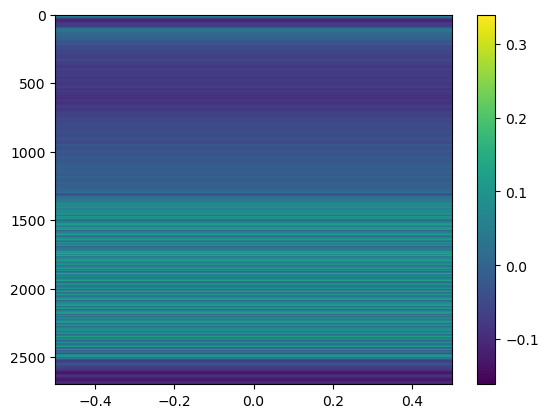

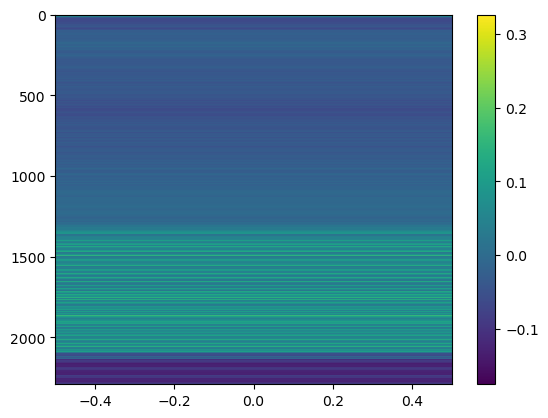

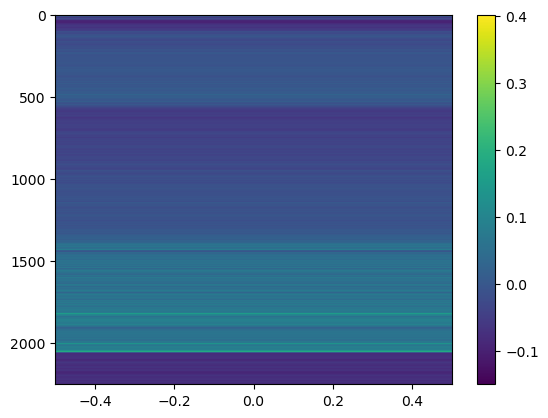

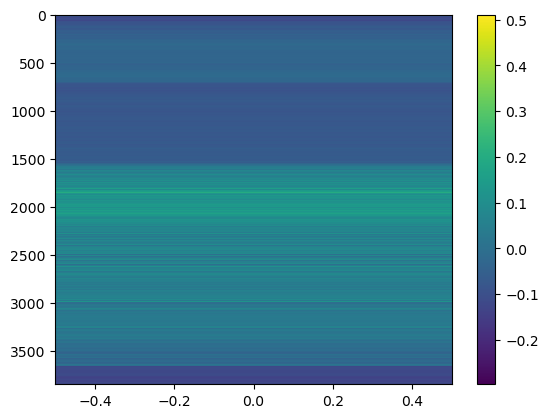

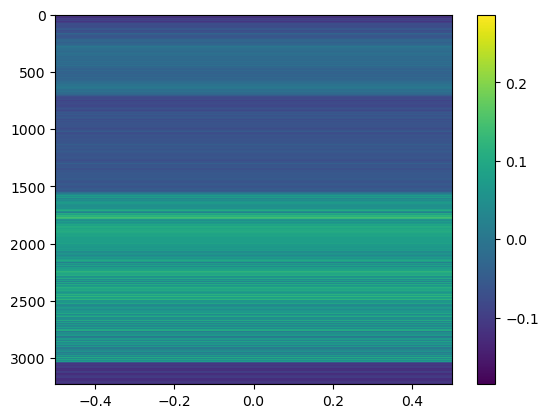

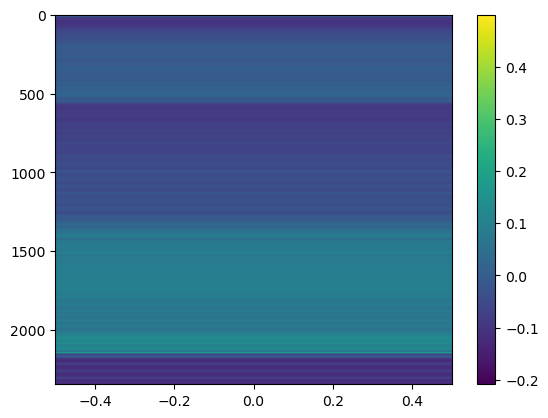

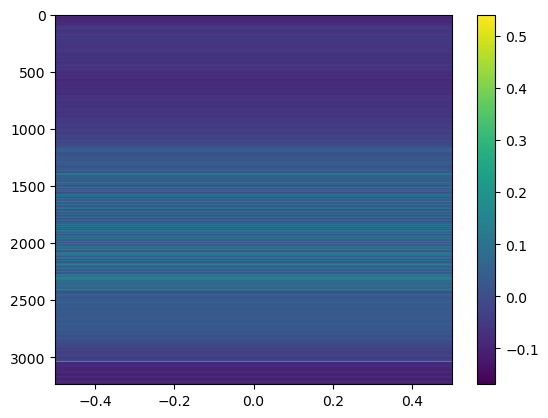

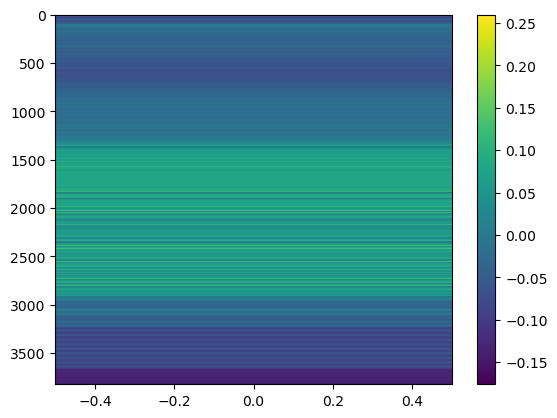

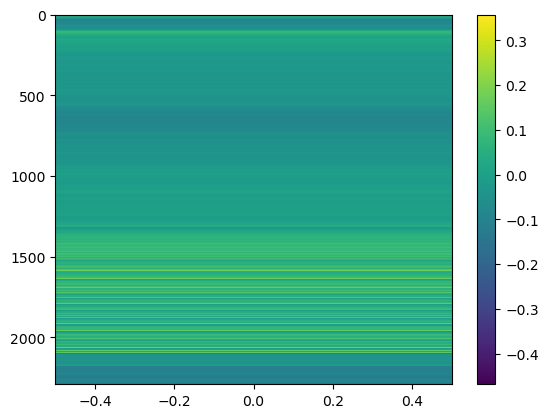

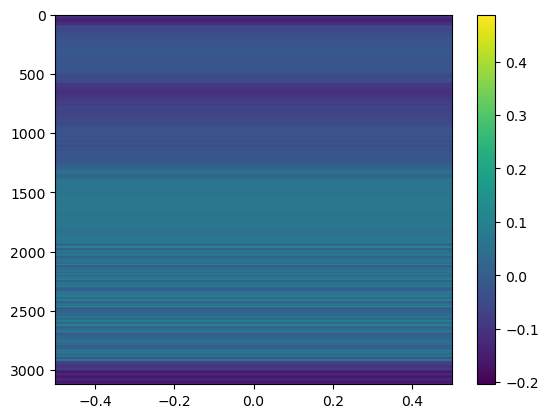

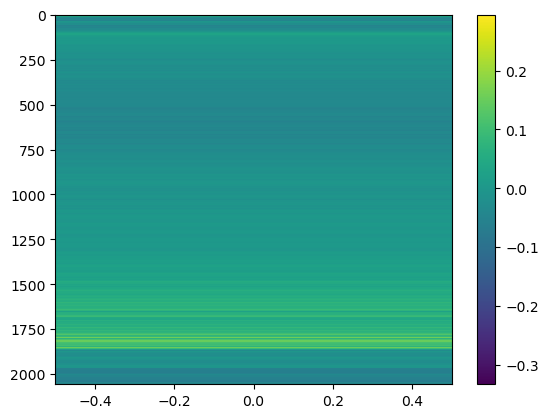

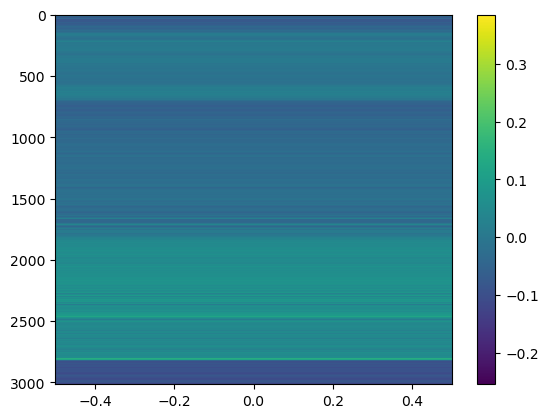

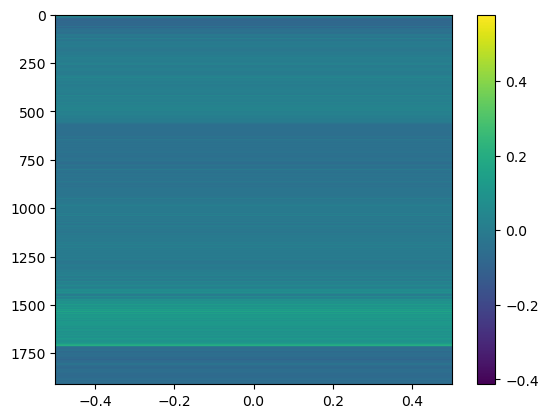

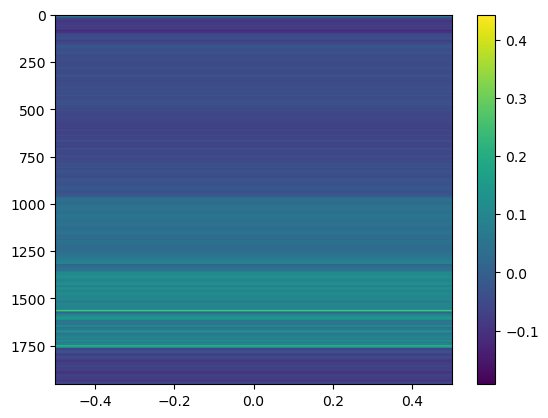

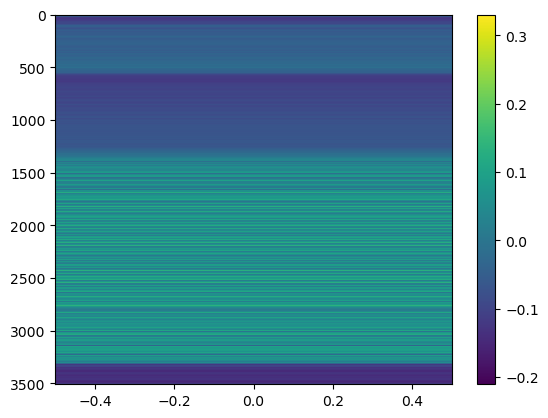

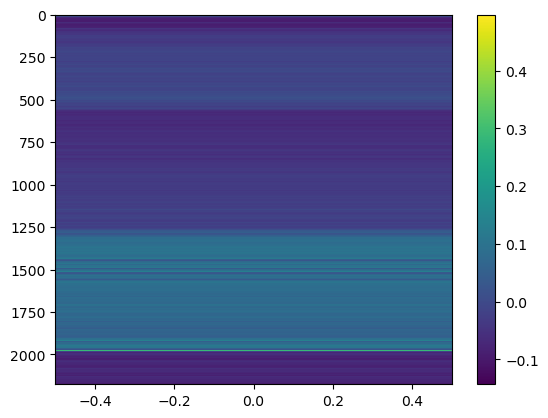

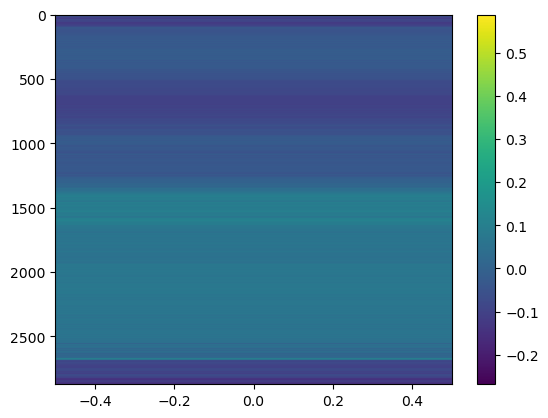

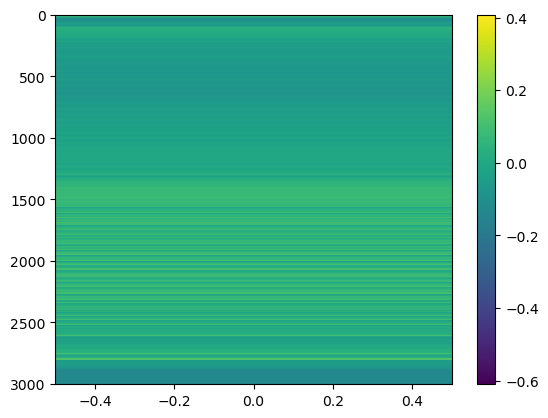

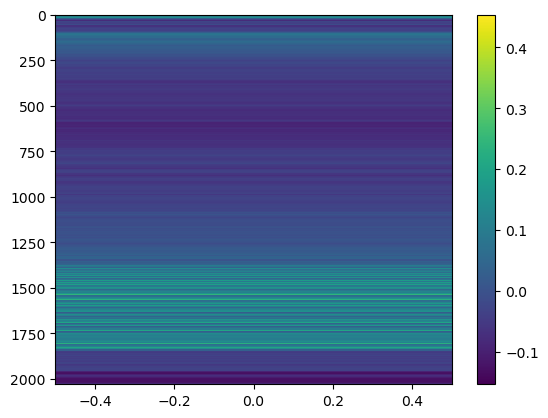

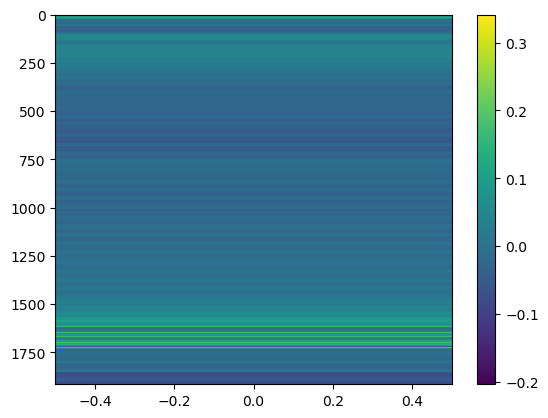

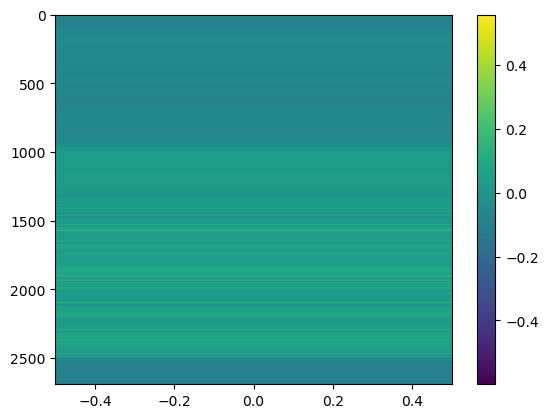

KeyboardInterrupt: 

In [14]:
for spec_odd in spec_odd_all:
    spec_odd = spec_odd / np.max(spec_odd)
    plt.imshow(np.mean(spec_odd, axis=1).reshape(spec_odd.shape[0], 1), aspect='auto')
    plt.colorbar()
    plt.show()
    

In [5]:
from itertools import groupby
import os
import matplotlib.pyplot as plt

labels_path = '../data/MHD_labels/'


In [16]:
from itertools import groupby
import os
import matplotlib.pyplot as plt

shotno = 73023
labels_path = '../data/MHD_labels/'

def process_labels(shotno, spec_time):

    label_time = []
    labels = []
    with open(os.path.join(labels_path, f'TCV_{shotno}_apau_MHD_labeled.csv')) as f:
        data = np.loadtxt(f, skiprows=1, delimiter=',')

        label_time = data[:, 0]
        labels = data[:, 4]

    perturbation_idx = np.where(labels == 2)[0]
    true_labels = np.zeros(len(spec_time))

    for _, g in groupby(enumerate(perturbation_idx), lambda k: k[0] - k[1]):
        start = next(g)[1]
        end = list(v for _, v in g)[-1] or [start]
        
        start_time = label_time[start]
        end_time = label_time[end]

        idx = np.where((spec_time >=  start_time) & (spec_time <= end_time))
        true_labels[idx] = 1

    return true_labels

def load_shot(shotno):
    with open(os.path.join(data_path, f"{shotno}.{file_ext}"), "rb") as f:
        if use_pickle:
            return pickle.load(f)
        else:
            return hickle.load(f)

data_shot = load_shot(shotno)
inputs = data_shot["x"]["spectrogram"]
spec_odd = inputs["OddN"]
f = inputs["frequency"]
t = inputs["time"]


labels = process_labels(shotno, t)
fig, ax = plt.subplots()
ax.imshow(spec_odd[::, ::-1].T, extent=(t[0], t[-1], f[0], f[-1]), aspect='auto', cmap='jet')

ax1 = ax.twinx()
ax1.plot(t, labels)
            

FileNotFoundError: [Errno 2] No such file or directory: '../data/MHD_labels/TCV_73023_apau_MHD_labeled.csv'

## Label distribution

In [13]:
total_length = 0
total_pos = 0

percent_of_pos = []

for shotno in all_shots:
        with open(os.path.join(labels_path, f'TCV_{shotno}_apau_MHD_labeled.csv')) as f:
                data = np.loadtxt(f, skiprows=1, delimiter=',')
                labels = data[:, 4]

                length = len(labels)
                nb_pos = (labels == 2).sum()

                total_length += length
                total_pos += nb_pos
                percent_of_pos.append(nb_pos / length)

percent_of_pos = np.array(percent_of_pos)

In [22]:
print(f'total length : {total_length}, total_pos : {total_pos}')
print(f'percent of positive label : {total_pos / total_length * 100:.2f}%')

print(f'Spec stat positive label: mean={percent_of_pos.mean():.2f}, std={percent_of_pos.std():.2f},' \
      f'min={percent_of_pos.min():.2f}, max={percent_of_pos.max():.2f}')

total length : 1182403, total_pos : 250048
percent of positive label : 21.15%
Spec stat positive label: mean=0.19, std=0.18,min=0.00, max=0.92


(array([14., 18., 14., 11.,  8.,  9.,  5.,  4.,  1.,  3.,  4.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  1.]),
 array([ 0.        ,  4.61647271,  9.23294541, 13.84941812, 18.46589082,
        23.08236353, 27.69883624, 32.31530894, 36.93178165, 41.54825436,
        46.16472706, 50.78119977, 55.39767247, 60.01414518, 64.63061789,
        69.24709059, 73.8635633 , 78.48003601, 83.09650871, 87.71298142,
        92.32945412]),
 <BarContainer object of 20 artists>)

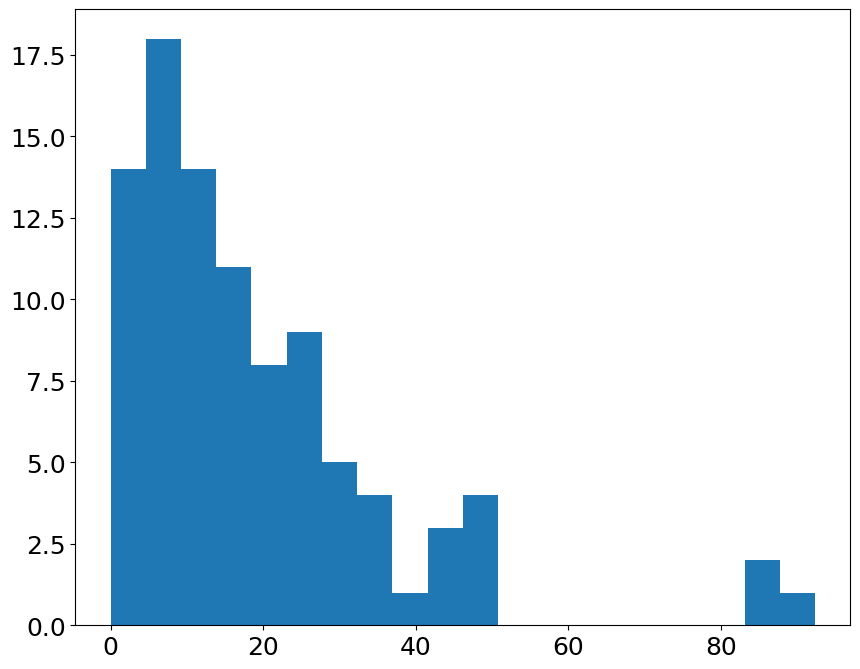

In [57]:
plt.hist(percent_of_pos * 100, bins=20)
plt.xlabel('percentage of perturbation per spectrogram')

In [8]:
pos_weight = total_length / total_pos
pos_weight

4.728704088814948